In [17]:
from itertools import product

from cv2 import COLOR_BGR2GRAY, cvtColor, imread, imshow, waitKey
from numpy import dot, exp, mgrid, pi, ravel, square, uint8, zeros

import matplotlib.pyplot as plt


In [18]:
def gen_gaussian_kernel(k_size, sigma):
    center = k_size // 2
    x, y = mgrid[0 - center : k_size - center, 0 - center : k_size - center]
    g = 1 / (2 * pi * sigma) * exp(-(square(x) + square(y)) / (2 * square(sigma)))
    return g



In [19]:

def gaussian_filter(image, k_size, sigma):
    height, width = image.shape[0], image.shape[1]
    # dst image height and width
    dst_height = height - k_size + 1
    dst_width = width - k_size + 1

    # im2col, turn the k_size*k_size pixels into a row and np.vstack all rows
    image_array = zeros((dst_height * dst_width, k_size * k_size))
    row = 0
    for i, j in product(range(dst_height), range(dst_width)):
        window = ravel(image[i : i + k_size, j : j + k_size])
        image_array[row, :] = window
        row += 1

    #  turn the kernel into shape(k*k, 1)
    gaussian_kernel = gen_gaussian_kernel(k_size, sigma)
    filter_array = ravel(gaussian_kernel)

    # reshape and get the dst image
    dst = dot(image_array, filter_array).reshape(dst_height, dst_width).astype(uint8)

    return dst



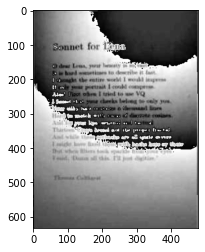

In [88]:

if __name__ == "__main__":
    # read original image
    img = imread("book.png")
    # turn image in gray scale value
    gray = cvtColor(img, COLOR_BGR2GRAY)

    # get values with two different mask size
    #gaussian3x3 = gaussian_filter(gray, 3, sigma=1)
    gaussian5x5 = gaussian_filter(gray, 10, sigma=0.07)

    # show result images
    #imshow("gaussian filter with 3x3 mask", gaussian3x3,cmap = "gray")
    plt.imshow(gaussian5x5,cmap = "gray")
